<a href="https://colab.research.google.com/github/stevegabriel1/afl_elo_ratings/blob/main/basic_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AFL 2021 season: 18 teams start with 1500 points**


Method for basic (initial) version:

1. Start with 1500 points for all teams
2. The pre-season/starting E value (or win probability) equals 0.5 for all teams
3. After Round 1 results, re-rate each team with using the 'new rating' formula: New Rating = old rating + K(1 - win prob) if they won,or New Rating = old rating + K(0 - win prob) if they lost ::note that K = 20
4. For the 2nd round, matchups decide the new win probabilities which then provide predictions for each game. Use the win probability formula: the inverse of 1 + {10 to the power of [(opposing team rating - team rating divided) by 400]}
5. Repeat

*Note: Additional features to be included in subsequent versions will include home/away advantage or disadvantage to modify win probabilities, and season starting points to reflect previous season's standings.*

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
team = ['ADL','BRI','CAR','COL','ESS','FRE','GEE','GLD','GWS','HAW','MEL','NME','PAD','RIC','STK','SYD','WBD','WCE']
rframe = pd.DataFrame(team)
rframe.head()

,0
0,ADL
1,BRI
2,CAR
3,COL
4,ESS


In [3]:
rframe['seq'] = rframe.index + 1
rframe['win_prob_w1'] = 0.5
rframe['rating_w_zero'] = 1500
rframe

,0,seq,win_prob_w1,rating_w_zero
0,ADL,1,0.5,1500
1,BRI,2,0.5,1500
2,CAR,3,0.5,1500
3,COL,4,0.5,1500
4,ESS,5,0.5,1500
5,FRE,6,0.5,1500
6,GEE,7,0.5,1500
7,GLD,8,0.5,1500
8,GWS,9,0.5,1500
9,HAW,10,0.5,1500


The results of week 1 games will create new ratings (rating_week_1) from which win probabilities for week two contests will be calculated.

In [4]:
# These were the Week 1 results in the order of teams above:
rframe['result_w1'] = [1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1]
rframe.head(10)

,0,seq,win_prob_w1,rating_w_zero,result_w1
0,ADL,1,0.5,1500,1
1,BRI,2,0.5,1500,0
2,CAR,3,0.5,1500,0
3,COL,4,0.5,1500,0
4,ESS,5,0.5,1500,0
5,FRE,6,0.5,1500,0
6,GEE,7,0.5,1500,0
7,GLD,8,0.5,1500,0
8,GWS,9,0.5,1500,0
9,HAW,10,0.5,1500,1


Calculation of the new ratings usus this formula:  
df['new_rating'] = df['rate'] + (20*(df['res'] - df['win_prob']))


In [5]:
rframe['rating_w_1'] = rframe['rating_w_zero'] + (20*(rframe['result_w1'] - rframe['win_prob_w1']))
rframe

,0,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1
0,ADL,1,0.5,1500,1,1510.0
1,BRI,2,0.5,1500,0,1490.0
2,CAR,3,0.5,1500,0,1490.0
3,COL,4,0.5,1500,0,1490.0
4,ESS,5,0.5,1500,0,1490.0
5,FRE,6,0.5,1500,0,1490.0
6,GEE,7,0.5,1500,0,1490.0
7,GLD,8,0.5,1500,0,1490.0
8,GWS,9,0.5,1500,0,1490.0
9,HAW,10,0.5,1500,1,1510.0


The next (Round 2) matchups are modelled as binary columns with 1 in competing team's positions, 0 in all other positions.
  

The R2 working data frame includes all of the columns from the previous summary df plus binary columns for R2 matchups:

In [6]:
contests_w2 = rframe
# For Carlton (CAR[3]) v Collingwood (COL[4]):
contests_w2['G1'] = np.where((contests_w2['seq'] == 3) |(contests_w2['seq'] == 4),1,0)

# For Geelong (GEE[7]) v Brisbane (BRI[2]):
contests_w2['G2'] = np.where((contests_w2['seq'] == 7) |(contests_w2['seq'] == 2),1,0)

# For Sydney (SYD[16]) v Adelaide (ADL[1]):
contests_w2['G3'] = np.where((contests_w2['seq'] == 16) |(contests_w2['seq'] == 1),1,0)

# For Port Adelaide (PAD[13]) v Essendon (ESS[5]):
contests_w2['G4'] = np.where((contests_w2['seq'] == 13) |(contests_w2['seq'] == 5),1,0)

# For StKilda (STK[15]) v Melbourne (MEL[11]):
contests_w2['G5'] = np.where((contests_w2['seq'] == 15) |(contests_w2['seq'] == 11),1,0)

# For Gold Coast (GLD[8]) v North Melbourne (NME[12]):
contests_w2['G6'] = np.where((contests_w2['seq'] == 8) |(contests_w2['seq'] == 12),1,0)

# For Hawthorn (HAW[10]) v Richmond (RIC[14]):
contests_w2['G7'] = np.where((contests_w2['seq'] == 10) |(contests_w2['seq'] == 14),1,0)

# For Western Bulldogs (WBD[17]) v West Coast (WCE[18]):
contests_w2['G8'] = np.where((contests_w2['seq'] == 17) |(contests_w2['seq'] == 18),1,0)

# For Fremantle (FRE[6]) v GWS (GWS[9]):
contests_w2['G9'] = np.where((contests_w2['seq'] == 6) |(contests_w2['seq'] == 9),1,0)

# Confirm all 18 positions have exactly one location:

col_list = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
contests_w2['sum_check'] = contests_w2[col_list].sum(axis=1)
contests_w2['sum_check']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
Name: sum_check, dtype: int64

In [7]:
contests_w2

,0,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,sum_check
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,1
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,1
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,1
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,1
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,1
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,1
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,1
7,GLD,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,1
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,1
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,1


In [8]:
contests_w2 = contests_w2.drop(['sum_check'], axis = 1)

### Calculating the win probabilities

Next, the win probabilities formula will be applied for all R2 games.

The expected outcome for both competing teams should be a fraction between 0 and 1. These translate into the probabilities of winning, which should sum to 1 for each contest. A draw outcome isn't consideed here, as in Australian Rules draws only occur about 1% of the time.

From Wikipedia https://en.wikipedia.org/wiki/Elo_rating_system

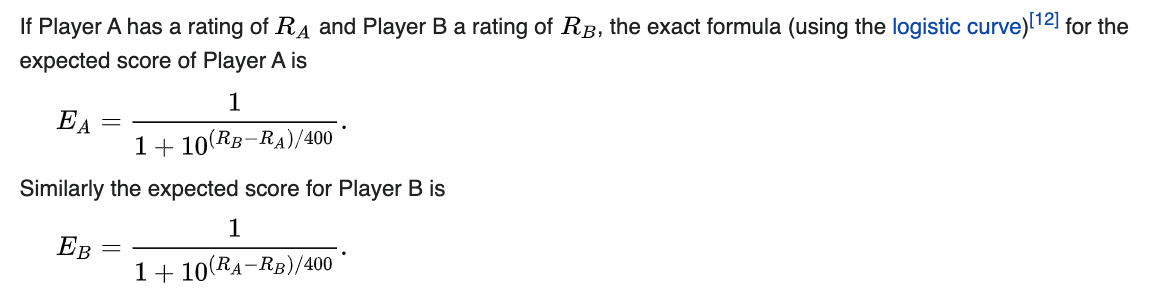

In [9]:
# Create opposition team rating column for R2:
contests_w2['opp_team'] = ['SYD','GEE','CAR','COL','PAD','GWS','BRI','NME','FRE','RIC','STK','GLD','ESS','HAW','MEL','ADL','WCE','WBD']
contests_w2

,0,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,opp_team
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,SYD
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,GEE
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,CAR
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,COL
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,PAD
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,GWS
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,BRI
7,GLD,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,NME
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,FRE
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,RIC


In [10]:
contests_w2.columns = ['team','seq','win_prob_w1','rating_w_zero','result_w1','rating_w_1','G1','G2','G3','G4','G5','G6','G7','G8','G9','opp_team']

In [11]:
# create concise lookup table which is a subset of contests_w2:
lookup_vals_w2 = contests_w2[['team','rating_w_1']]
lookup_vals_w2.columns = ['opp_team','rating_w1_opp']
lookup_vals_w2.head()

,opp_team,rating_w1_opp
0,ADL,1510.0
1,BRI,1490.0
2,CAR,1490.0
3,COL,1490.0
4,ESS,1490.0


In [12]:
w2_joined = pd.merge(contests_w2, 
                      lookup_vals_w2, 
                      on ='opp_team', 
                      how ='left')

In [13]:
w2_joined

,team,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,opp_team,rating_w1_opp
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,SYD,1510.0
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,GEE,1490.0
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,CAR,1490.0
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,COL,1490.0
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,PAD,1510.0
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,GWS,1490.0
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,BRI,1490.0
7,GLD,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,NME,1490.0
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,FRE,1490.0
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,RIC,1510.0


In [14]:
## Now the formula can be applied row by row:
w2_joined['win_prob_w2'] = 1/(1 + (10**((w2_joined['rating_w1_opp']-w2_joined['rating_w_1'])/400)))

In [15]:
w2_joined

,team,seq,win_prob_w1,rating_w_zero,result_w1,rating_w_1,G1,G2,G3,G4,G5,G6,G7,G8,G9,opp_team,rating_w1_opp,win_prob_w2
0,ADL,1,0.5,1500,1,1510.0,0,0,1,0,0,0,0,0,0,SYD,1510.0,0.500000
1,BRI,2,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,GEE,1490.0,0.500000
2,CAR,3,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,CAR,1490.0,0.500000
3,COL,4,0.5,1500,0,1490.0,1,0,0,0,0,0,0,0,0,COL,1490.0,0.500000
4,ESS,5,0.5,1500,0,1490.0,0,0,0,1,0,0,0,0,0,PAD,1510.0,0.471249
5,FRE,6,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,GWS,1490.0,0.500000
6,GEE,7,0.5,1500,0,1490.0,0,1,0,0,0,0,0,0,0,BRI,1490.0,0.500000
7,GLD,8,0.5,1500,0,1490.0,0,0,0,0,0,1,0,0,0,NME,1490.0,0.500000
8,GWS,9,0.5,1500,0,1490.0,0,0,0,0,0,0,0,0,1,FRE,1490.0,0.500000
9,HAW,10,0.5,1500,1,1510.0,0,0,0,0,0,0,1,0,0,RIC,1510.0,0.500000


Only 1 game in W2 is between 'unbalanced' teams, a R1 winner v R1 loser namely Port Adelaide v Essendon. All others are between 2 winners or two losers.

Next, we can create the next version of rframe (need to calculate new ratings for each team first), which contains just these colums: team seq, win_prob_w2, rating_w1, result_w2, rating_w2.

Already have all these, except for the last two: result_w2 and rating_w2

1. Extract the columns we already know, from w2_joined:

In [16]:
rframe_2 = w2_joined[['team','seq','win_prob_w2','rating_w_1']]

2. Add the results for R2:

In [17]:
rframe_2['result_w2'] = [0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0]

In [18]:
rframe_2

,team,seq,win_prob_w2,rating_w_1,result_w2
0,ADL,1,0.500000,1510.0,0
1,BRI,2,0.500000,1490.0,0
2,CAR,3,0.500000,1490.0,0
3,COL,4,0.500000,1490.0,1
4,ESS,5,0.471249,1490.0,0
5,FRE,6,0.500000,1490.0,1
6,GEE,7,0.500000,1490.0,1
7,GLD,8,0.500000,1490.0,1
8,GWS,9,0.500000,1490.0,0
9,HAW,10,0.500000,1510.0,0


3. Calculate new ratings column:

In [19]:
rframe_2['rating_w_2'] = rframe_2['rating_w_1'] + (20*(rframe_2['result_w2'] - rframe_2['win_prob_w2']))
rframe_2['rating_w_2'] = rframe_2['rating_w_2'].round(2)
rframe_2

,team,seq,win_prob_w2,rating_w_1,result_w2,rating_w_2
0,ADL,1,0.500000,1510.0,0,1500.00
1,BRI,2,0.500000,1490.0,0,1480.00
2,CAR,3,0.500000,1490.0,0,1480.00
3,COL,4,0.500000,1490.0,1,1500.00
4,ESS,5,0.471249,1490.0,0,1480.58
5,FRE,6,0.500000,1490.0,1,1500.00
6,GEE,7,0.500000,1490.0,1,1500.00
7,GLD,8,0.500000,1490.0,1,1500.00
8,GWS,9,0.500000,1490.0,0,1480.00
9,HAW,10,0.500000,1510.0,0,1500.00


### **Modelling the next matches (Round 3): same steps as above, but use functions to decrease code.**